<a href="https://colab.research.google.com/github/jucadar/Datos-Proyecto-Experimental/blob/main/Exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
!pip install uncertainties
from uncertainties import ufloat
from uncertainties.umath import * 
import pandas as pd
import scipy as sp
from uncertainties import unumpy
from scipy.constants import *
from scipy import stats
from scipy.signal import find_peaks
import csv
import statistics

Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 98 kB 4.3 MB/s 


In [2]:
data02 = pd.read_csv('0_2_Coincidencias.csv') #Carga datos
data03 = pd.read_csv('0_3_Coincidencias.csv')
data04 = pd.read_csv('0_4_Coincidencias.csv')
data05 = pd.read_csv('0_5_Coincidencias.csv')
data06 = pd.read_csv('0_6_Coincidencias.csv')
data07 = pd.read_csv('0_7_Coincidencias.csv')
data08 = pd.read_csv('0_8_Coincidencias.csv')
data09 = pd.read_csv('0_9_Coincidencias.csv')
data10 = pd.read_csv('1_0_Coincidencias.csv')
data11 = pd.read_csv('1_1_Coincidencias.csv')
data12 = pd.read_csv('1_2_Coincidencias.csv')
data13 = pd.read_csv('1_3_Coincidencias.csv')
data14 = pd.read_csv('1_4_Coincidencias.csv')
data15 = pd.read_csv('1_5_Coincidencias.csv')
data16 = pd.read_csv('1_6_Coincidencias.csv')
data17 = pd.read_csv('1_7_Coincidencias.csv')
data18 = pd.read_csv('1_8_Coincidencias.csv')
data19 = pd.read_csv('1_9_Coincidencias.csv')
data20 = pd.read_csv('2_0_Coincidencias.csv')
data21 = pd.read_csv('2_1_Coincidencias.csv')
data22 = pd.read_csv('2_2_Coincidencias.csv')
data23 = pd.read_csv('2_3_Coincidencias.csv')
data24 = pd.read_csv('2_4_Coincidencias.csv')
data25 = pd.read_csv('2_5_Coincidencias.csv')
data26 = pd.read_csv('2_6_Coincidencias.csv')
data27 = pd.read_csv('2_7_Coincidencias.csv')

In [3]:
ND = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7]
T = np.array([data02['t (s) - HBT Measurement'],data03['t (s) - HBT Measurement'],data04['t (s) - HBT Measurement'],data05['t (s) - HBT Measurement'],data06['t (s) - HBT Measurement'],data07['t (s) - HBT Measurement'],data08['t (s) - HBT Measurement'],data09['t (s) - HBT Measurement'],data10['t (s) - HBT Measurement'],data11['t (s) - HBT Measurement'],data12['t (s) - HBT Measurement'],data13['t (s) - HBT Measurement'],data14['t (s) - HBT Measurement'],data15['t (s) - HBT Measurement'],data16['t (s) - HBT Measurement'],data17['t (s) - HBT Measurement'],data18['t (s) - HBT Measurement'],data19['t (s) - HBT Measurement'],data20['t (s) - HBT Measurement'],data21['t (s) - HBT Measurement'],data22['t (s) - HBT Measurement'],data23['t (s) - HBT Measurement'],data24['t (s) - HBT Measurement'],data25['t (s) - HBT Measurement'],data26['t (s) - HBT Measurement'],data27['t (s) - HBT Measurement']])
t = []
for i in range(shape(T)[0]):
    tc = [0]
    for j in T[i][1:]:
        if j[-1] == 'p': #pasa de ps a ns
            tc.append(float(j[:-1:].replace(',','.'))/1000)    
        else:
            tc.append(float(j[:-1:].replace(',','.')))
    t.append(tc)

In [4]:
# N = np.array([50*data02['Start-Stop Historam (events per second) - HBT Measurement'],50*data03['Start-Stop Historam (events per second) - HBT Measurement'],50*data04['Start-Stop Historam (events per second) - HBT Measurement'],50*data05['Start-Stop Historam (events per second) - HBT Measurement'],50*data06['Start-Stop Historam (events per second) - HBT Measurement'],50*data07['Start-Stop Historam (events per second) - HBT Measurement'],data08['Start-Stop Historam (events per second) - HBT Measurement'],data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
N = np.array([data02['Start-Stop Historam (events per second) - HBT Measurement'],data03['Start-Stop Historam (events per second) - HBT Measurement'],data04['Start-Stop Historam (events per second) - HBT Measurement'],data05['Start-Stop Historam (events per second) - HBT Measurement'],data06['Start-Stop Historam (events per second) - HBT Measurement'],data07['Start-Stop Historam (events per second) - HBT Measurement'],data08['Start-Stop Historam (events per second) - HBT Measurement'],data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
n = []
for i in range(shape(N)[0]):
    nc = []
    for j in N[i]:
        nc.append(j)
    n.append(nc)

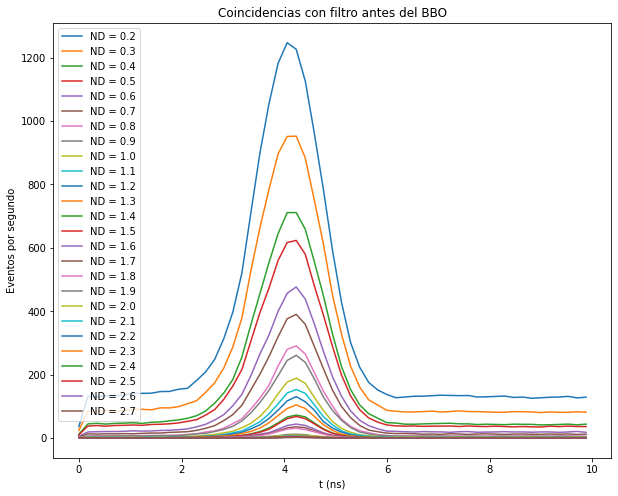

In [5]:
figure(figsize=(10,8))
for i in range(len(ND)):
    plot(t[i],n[i], label = 'ND = %.1f' %(ND[i]))
    legend()
    xlabel('t (ns)')
    ylabel('Eventos por segundo')
    title('Coincidencias con filtro antes del BBO')
savefig('Counts_W')

In [6]:
Ptau = []
Pcoin = []
for i in range(len(ND)):
    ct = []
    cc = []
    m_index = n[i].index(max(n[i]))
    tau = np.std(t[i])
    x = linspace(t[i][m_index]-tau/2,t[i][m_index]+tau/2,10)
    I = []
    C = []
    for j in t[i]:
        if abs(t[i][m_index] - j) < tau/2:
            ct.append(j)
            cc.append(n[i][t[i].index(j)])
    for k in x:
        d = abs(k-np.array(ct)).tolist()
        I.append(ct[d.index(min(d))])
        C.append(cc[d.index(min(d))])

    Ptau.append(I)
    Pcoin.append(C)

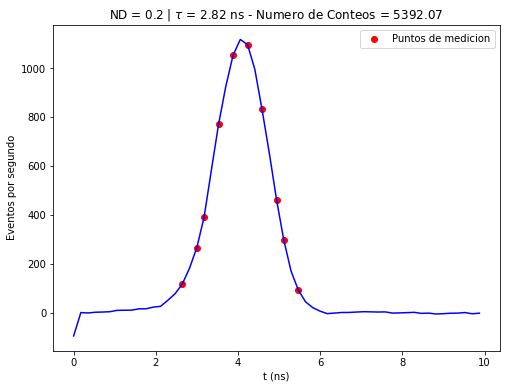

In [7]:
figure(figsize=(8,6))
plot(t[0],n[0]-mean(n[0][-11:-1]), c = 'b')
scatter(Ptau[0],Pcoin[0]-mean(n[0][-11:-1]), c = 'r', label = 'Puntos de medicion')
title(r'ND = 0.2 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(Ptau[0][-1]-Ptau[0][0],sum(Pcoin[0]-mean(n[0][-11:-1]))))
xlabel('t (ns)')
ylabel('Eventos por segundo')
legend()
savefig('Sum_first')

In [8]:
data02 = pd.read_csv('0_2_CoincidenciasB.csv') #Carga datos
data03 = pd.read_csv('0_3_CoincidenciasB.csv')
data04 = pd.read_csv('0_4_CoincidenciasB.csv')
data05 = pd.read_csv('0_5_CoincidenciasB.csv')
data06 = pd.read_csv('0_6_CoincidenciasB.csv')
data07 = pd.read_csv('0_7_CoincidenciasB.csv')
data08 = pd.read_csv('0_8_CoincidenciasB.csv')
data09 = pd.read_csv('0_9_CoincidenciasB.csv')
data10 = pd.read_csv('1_0_CoincidenciasB.csv')
data11 = pd.read_csv('1_1_CoincidenciasB.csv')
data12 = pd.read_csv('1_2_CoincidenciasB.csv')
data13 = pd.read_csv('1_3_CoincidenciasB.csv')
data14 = pd.read_csv('1_4_CoincidenciasB.csv')
data15 = pd.read_csv('1_5_CoincidenciasB.csv')
data16 = pd.read_csv('1_6_CoincidenciasB.csv')
data17 = pd.read_csv('1_7_CoincidenciasB.csv')
data18 = pd.read_csv('1_8_CoincidenciasB.csv')
data19 = pd.read_csv('1_9_CoincidenciasB.csv')
data20 = pd.read_csv('2_0_CoincidenciasB.csv')
data21 = pd.read_csv('2_1_CoincidenciasB.csv')
data22 = pd.read_csv('2_2_CoincidenciasB.csv')
data23 = pd.read_csv('2_3_CoincidenciasB.csv')
data24 = pd.read_csv('2_4_CoincidenciasB.csv')
data25 = pd.read_csv('2_5_CoincidenciasB.csv')
data26 = pd.read_csv('2_6_CoincidenciasB.csv')
data27 = pd.read_csv('2_7_CoincidenciasB.csv')

In [9]:
TF = np.array([data02['t (s) - HBT Measurement'],data03['t (s) - HBT Measurement'],data04['t (s) - HBT Measurement'],data05['t (s) - HBT Measurement'],data06['t (s) - HBT Measurement'],data07['t (s) - HBT Measurement'],data08['t (s) - HBT Measurement'],data09['t (s) - HBT Measurement'],data10['t (s) - HBT Measurement'],data11['t (s) - HBT Measurement'],data12['t (s) - HBT Measurement'],data13['t (s) - HBT Measurement'],data14['t (s) - HBT Measurement'],data15['t (s) - HBT Measurement'],data16['t (s) - HBT Measurement'],data17['t (s) - HBT Measurement'],data18['t (s) - HBT Measurement'],data19['t (s) - HBT Measurement'],data20['t (s) - HBT Measurement'],data21['t (s) - HBT Measurement'],data22['t (s) - HBT Measurement'],data23['t (s) - HBT Measurement'],data24['t (s) - HBT Measurement'],data25['t (s) - HBT Measurement'],data26['t (s) - HBT Measurement'],data27['t (s) - HBT Measurement']])
tF = []
for i in range(shape(TF)[0]):
    tc = [0]
    for j in TF[i][1:]:
        if j[-1] == 'p': #pasa de ps a ns
            tc.append(float(j[:-1:].replace(',','.'))/1000)    
        else:
            tc.append(float(j[:-1:].replace(',','.')))
    tF.append(tc)

In [10]:
# NF = np.array([150*data02['Start-Stop Historam (events per second) - HBT Measurement'],150*data03['Start-Stop Historam (events per second) - HBT Measurement'],150*data04['Start-Stop Historam (events per second) - HBT Measurement'],150*data05['Start-Stop Historam (events per second) - HBT Measurement'],150*data06['Start-Stop Historam (events per second) - HBT Measurement'],150*data07['Start-Stop Historam (events per second) - HBT Measurement'],150*data08['Start-Stop Historam (events per second) - HBT Measurement'],150*data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
NF = np.array([data02['Start-Stop Historam (events per second) - HBT Measurement'],data03['Start-Stop Historam (events per second) - HBT Measurement'],data04['Start-Stop Historam (events per second) - HBT Measurement'],data05['Start-Stop Historam (events per second) - HBT Measurement'],data06['Start-Stop Historam (events per second) - HBT Measurement'],data07['Start-Stop Historam (events per second) - HBT Measurement'],data08['Start-Stop Historam (events per second) - HBT Measurement'],data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
nF = []
for i in range(shape(NF)[0]):
    nc = []
    for j in NF[i]:
        nc.append(j)
    nF.append(nc)

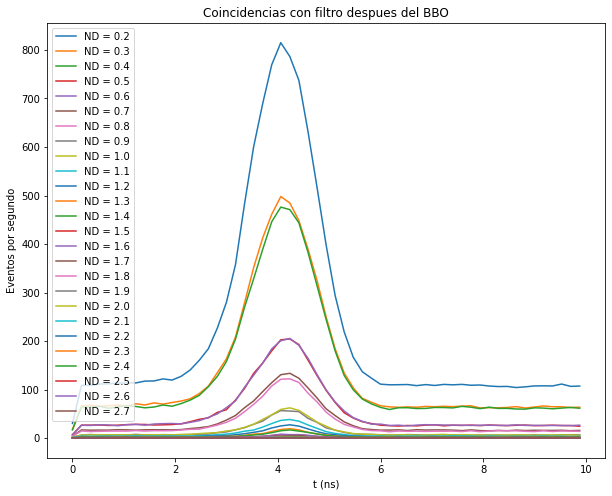

In [11]:
figure(figsize=(10,8))
for i in range(len(ND)):
    plot(tF[i],nF[i], label = 'ND = %.1f' %(ND[i]))
    legend()
    xlabel('t (ns)')
    ylabel('Eventos por segundo')
    title('Coincidencias con filtro despues del BBO')
savefig('CountsF')

In [12]:
PtauF = []
PcoinF = []
for i in range(len(ND)):
    ct = []
    cc = []
    m_index = nF[i].index(max(nF[i]))
    tau = np.std(tF[i])
    x = linspace(tF[i][m_index]-tau/2,tF[i][m_index]+tau/2,10)
    I = []
    C = []
    for j in tF[i]:
        if abs(tF[i][m_index] - j) < tau/2:
            ct.append(j)
            cc.append(nF[i][t[i].index(j)])
    for k in x:
        d = abs(k-np.array(ct)).tolist()
        I.append(ct[d.index(min(d))])
        C.append(cc[d.index(min(d))])

    PtauF.append(I)
    PcoinF.append(C)

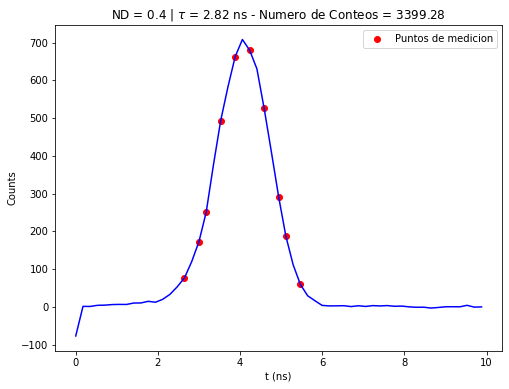

In [13]:
figure(figsize=(8,6))
plot(tF[0],nF[0]-mean(nF[0][-11:-1]), c = 'b')
scatter(PtauF[0],PcoinF[0]-mean(nF[0][-11:-1]), c = 'r', label = 'Puntos de medicion')
title(r'ND = 0.4 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(PtauF[0][-1]-PtauF[0][0],sum(PcoinF[0]-mean(nF[0][-11:-1]))))
xlabel('t (ns)')
ylabel('Counts')
legend()

In [14]:
data02 = pd.read_csv('0_2_Conteos.csv') #Carga datos
data03 = pd.read_csv('0_3_Conteos.csv')
data04 = pd.read_csv('0_4_Conteos.csv')
data05 = pd.read_csv('0_5_Conteos.csv')
data06 = pd.read_csv('0_6_Conteos.csv')
data07 = pd.read_csv('0_7_Conteos.csv')
data08 = pd.read_csv('0_8_Conteos.csv')
data09 = pd.read_csv('0_9_Conteos.csv')
data10 = pd.read_csv('1_0_Conteos.csv')
data11 = pd.read_csv('1_1_Conteos.csv')
data12 = pd.read_csv('1_2_Conteos.csv')
data13 = pd.read_csv('1_3_Conteos.csv')
data14 = pd.read_csv('1_4_Conteos.csv')
data15 = pd.read_csv('1_5_Conteos.csv')
data16 = pd.read_csv('1_6_Conteos.csv')
data17 = pd.read_csv('1_7_Conteos.csv')
data18 = pd.read_csv('1_8_Conteos.csv')
data19 = pd.read_csv('1_9_Conteos.csv')
data20 = pd.read_csv('2_0_Conteos.csv')
data21 = pd.read_csv('2_1_Conteos.csv')
data22 = pd.read_csv('2_2_Conteos.csv')
data23 = pd.read_csv('2_3_Conteos.csv')
data24 = pd.read_csv('2_4_Conteos.csv')
data25 = pd.read_csv('2_5_Conteos.csv')
data26 = pd.read_csv('2_6_Conteos.csv')
data27 = pd.read_csv('2_7_Conteos.csv')
dark = pd.read_csv('Dark.csv')

In [15]:
b1 = dark['Count rates (per second) - Singles 1']
b2 = dark['Count rates (per second) - Singles 2']
B1 = []
B2 = []
for i in range(len(b1)):
    B1.append(float(b1[i][:-1:].replace(',','.'))*1000)
    B2.append(float(b2[i][:-1:].replace(',','.'))*1000)

In [16]:
N1 = mean(B1)
N2 = mean(B2)

In [17]:
Ts = [data02['Time - Singles 1'],data03['Time - Singles 1'],data04['Time - Singles 1'],data05['Time - Singles 1'],data06['Time - Singles 1'],data07['Time - Singles 1'],data08['Time - Singles 1'],data09['Time - Singles 1'],data10['Time - Singles 1'],data11['Time - Singles 1'],data12['Time - Singles 1'],data13['Time - Singles 1'],data14['Time - Singles 1'],data15['Time - Singles 1'],data16['Time - Singles 1'],data17['Time - Singles 1'],data18['Time - Singles 1'],data19['Time - Singles 1'],data20['Time - Singles 1'],data21['Time - Singles 1'],data22['Time - Singles 1'],data23['Time - Singles 1'],data24['Time - Singles 1'],data25['Time - Singles 1'],data26['Time - Singles 1'],data27['Time - Singles 1']]
for i in range(len(Ts)):
    Ts[i] = Ts[i]-Ts[i][0]
D1 = [data02['Count rates (per second) - Singles 1'],data03['Count rates (per second) - Singles 1'],data04['Count rates (per second) - Singles 1'],data05['Count rates (per second) - Singles 1'],data06['Count rates (per second) - Singles 1'],data07['Count rates (per second) - Singles 1'],data08['Count rates (per second) - Singles 1'],data09['Count rates (per second) - Singles 1'],data10['Count rates (per second) - Singles 1'],data11['Count rates (per second) - Singles 1'],data12['Count rates (per second) - Singles 1'],data13['Count rates (per second) - Singles 1'],data14['Count rates (per second) - Singles 1'],data15['Count rates (per second) - Singles 1'],data16['Count rates (per second) - Singles 1'],data17['Count rates (per second) - Singles 1'],data18['Count rates (per second) - Singles 1'],data19['Count rates (per second) - Singles 1'],data20['Count rates (per second) - Singles 1'],data21['Count rates (per second) - Singles 1'],data22['Count rates (per second) - Singles 1'],data23['Count rates (per second) - Singles 1'],data24['Count rates (per second) - Singles 1'],data25['Count rates (per second) - Singles 1'],data26['Count rates (per second) - Singles 1'],data27['Count rates (per second) - Singles 1']]
d1 = []
D2 = [data02['Count rates (per second) - Singles 2'],data03['Count rates (per second) - Singles 2'],data04['Count rates (per second) - Singles 2'],data05['Count rates (per second) - Singles 2'],data06['Count rates (per second) - Singles 2'],data07['Count rates (per second) - Singles 2'],data08['Count rates (per second) - Singles 2'],data09['Count rates (per second) - Singles 2'],data10['Count rates (per second) - Singles 2'],data11['Count rates (per second) - Singles 2'],data12['Count rates (per second) - Singles 2'],data13['Count rates (per second) - Singles 2'],data14['Count rates (per second) - Singles 2'],data15['Count rates (per second) - Singles 2'],data16['Count rates (per second) - Singles 2'],data17['Count rates (per second) - Singles 2'],data18['Count rates (per second) - Singles 2'],data19['Count rates (per second) - Singles 2'],data20['Count rates (per second) - Singles 2'],data21['Count rates (per second) - Singles 2'],data22['Count rates (per second) - Singles 2'],data23['Count rates (per second) - Singles 2'],data24['Count rates (per second) - Singles 2'],data25['Count rates (per second) - Singles 2'],data26['Count rates (per second) - Singles 2'],data27['Count rates (per second) - Singles 2']]
d2 = []
C = [data02['Count rates (per second) - Coinc 1+2'],data03['Count rates (per second) - Coinc 1+2'],data04['Count rates (per second) - Coinc 1+2'],data05['Count rates (per second) - Coinc 1+2'],data06['Count rates (per second) - Coinc 1+2'],data07['Count rates (per second) - Coinc 1+2'],data08['Count rates (per second) - Coinc 1+2'],data09['Count rates (per second) - Coinc 1+2'],data10['Count rates (per second) - Coinc 1+2'],data11['Count rates (per second) - Coinc 1+2'],data12['Count rates (per second) - Coinc 1+2'],data13['Count rates (per second) - Coinc 1+2'],data14['Count rates (per second) - Coinc 1+2'],data15['Count rates (per second) - Coinc 1+2'],data16['Count rates (per second) - Coinc 1+2'],data17['Count rates (per second) - Coinc 1+2'],data18['Count rates (per second) - Coinc 1+2'],data19['Count rates (per second) - Coinc 1+2'],data20['Count rates (per second) - Coinc 1+2'],data21['Count rates (per second) - Coinc 1+2'],data22['Count rates (per second) - Coinc 1+2'],data23['Count rates (per second) - Coinc 1+2'],data24['Count rates (per second) - Coinc 1+2'],data25['Count rates (per second) - Coinc 1+2'],data26['Count rates (per second) - Coinc 1+2'],data27['Count rates (per second) - Coinc 1+2']]
c = []
for i in range(len(D1)):
    dc1 = []
    dc2 = []
    cc = []
    for j in D1[i]:
        dc1.append(float(j[:-1:].replace(',','.'))*1000)
    for j in D2[i]:
        dc2.append(float(j[:-1:].replace(',','.'))*1000)
    for j in C[i]:
        if type(j) == str:
            cc.append(float(j[:-1:].replace(',','.'))*1000)
        else:
            cc.append(j)
    d1.append(dc1-N1)
    d2.append(dc2-N2)
    c.append(cc)

In [18]:
# for i in range(6):
#     d1[i] = 10*d1[i]
#     d2[i] = 10*d2[i]

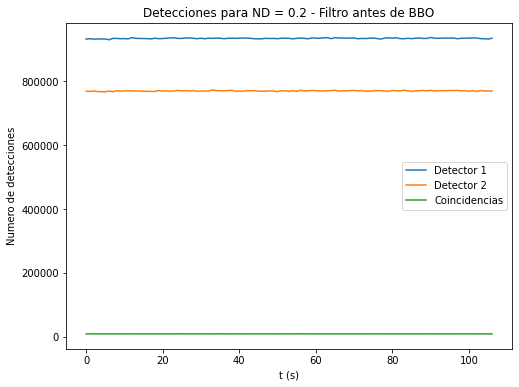

In [19]:
figure(figsize=(8,6))
plot(Ts[0],d1[0], label = 'Detector 1')
plot(Ts[0],d2[0], label = 'Detector 2')
plot(Ts[0],c[0], label = 'Coincidencias')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Detecciones para ND = 0.2 - Filtro antes de BBO')
legend()
savefig('Detecciones')

In [20]:
singles1 = []
singles2 = []
Coin = []
for i in range(len(ND)):
    singles1.append(mean(d1[i]))
    singles2.append(mean(d2[i]))
    Coin.append(sum(Pcoin[i]-mean(n[i][-11:-1]))) 

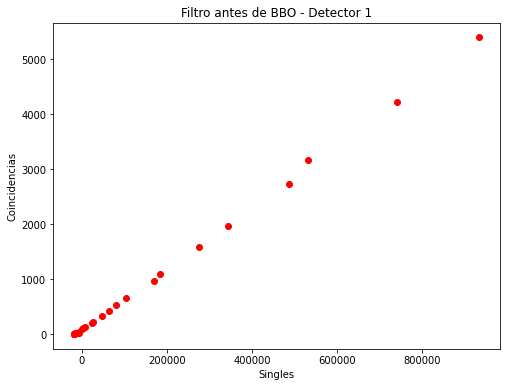

In [21]:
figure(figsize=(8,6))
# plot(singles1, Coin, c = 'b')
scatter(singles1, Coin, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro antes de BBO - Detector 1')
savefig('Singles1Vcoin_NoFilter')

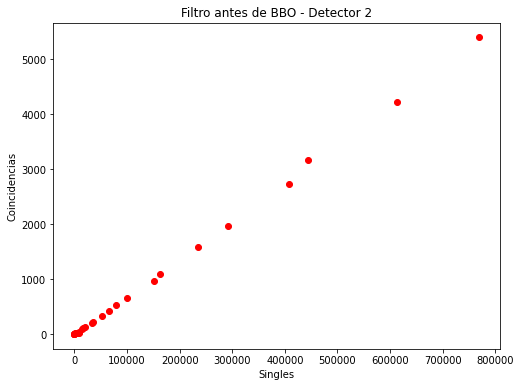

In [22]:
figure(figsize=(8,6))
# plot(singles2, Coin, c = 'b')
scatter(singles2, Coin, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro antes de BBO - Detector 2')
savefig('Singles2Vcoin_NoFilter')

In [23]:
data02 = pd.read_csv('0_2_ConteosB.csv') #Carga datos
data03 = pd.read_csv('0_3_ConteosB.csv')
data04 = pd.read_csv('0_4_ConteosB.csv')
data05 = pd.read_csv('0_5_ConteosB.csv')
data06 = pd.read_csv('0_6_ConteosB.csv')
data07 = pd.read_csv('0_7_ConteosB.csv')
data08 = pd.read_csv('0_8_ConteosB.csv')
data09 = pd.read_csv('0_9_ConteosB.csv')
data10 = pd.read_csv('1_0_ConteosB.csv')
data11 = pd.read_csv('1_1_ConteosB.csv')
data12 = pd.read_csv('1_2_ConteosB.csv')
data13 = pd.read_csv('1_3_ConteosB.csv')
data14 = pd.read_csv('1_4_ConteosB.csv')
data15 = pd.read_csv('1_5_ConteosB.csv')
data16 = pd.read_csv('1_6_ConteosB.csv')
data17 = pd.read_csv('1_7_ConteosB.csv')
data18 = pd.read_csv('1_8_ConteosB.csv')
data19 = pd.read_csv('1_9_ConteosB.csv')
data20 = pd.read_csv('2_0_ConteosB.csv')
data21 = pd.read_csv('2_1_ConteosB.csv')
data22 = pd.read_csv('2_2_ConteosB.csv')
data23 = pd.read_csv('2_3_ConteosB.csv')
data24 = pd.read_csv('2_4_ConteosB.csv')
data25 = pd.read_csv('2_5_ConteosB.csv')
data26 = pd.read_csv('2_6_ConteosB.csv')
data27 = pd.read_csv('2_7_ConteosB.csv')

In [24]:
TFs = [data02['Time - Singles 1'],data03['Time - Singles 1'],data04['Time - Singles 1'],data05['Time - Singles 1'],data06['Time - Singles 1'],data07['Time - Singles 1'],data08['Time - Singles 1'],data09['Time - Singles 1'],data10['Time - Singles 1'],data11['Time - Singles 1'],data12['Time - Singles 1'],data13['Time - Singles 1'],data14['Time - Singles 1'],data15['Time - Singles 1'],data16['Time - Singles 1'],data17['Time - Singles 1'],data18['Time - Singles 1'],data19['Time - Singles 1'],data20['Time - Singles 1'],data21['Time - Singles 1'],data22['Time - Singles 1'],data23['Time - Singles 1'],data24['Time - Singles 1'],data25['Time - Singles 1'],data26['Time - Singles 1'],data27['Time - Singles 1']]
for i in range(len(TFs)):
    TFs[i] = TFs[i]-TFs[i][0]
DF1 = [data02['Count rates (per second) - Singles 1'],data03['Count rates (per second) - Singles 1'],data04['Count rates (per second) - Singles 1'],data05['Count rates (per second) - Singles 1'],data06['Count rates (per second) - Singles 1'],data07['Count rates (per second) - Singles 1'],data08['Count rates (per second) - Singles 1'],data09['Count rates (per second) - Singles 1'],data10['Count rates (per second) - Singles 1'],data11['Count rates (per second) - Singles 1'],data12['Count rates (per second) - Singles 1'],data13['Count rates (per second) - Singles 1'],data14['Count rates (per second) - Singles 1'],data15['Count rates (per second) - Singles 1'],data16['Count rates (per second) - Singles 1'],data17['Count rates (per second) - Singles 1'],data18['Count rates (per second) - Singles 1'],data19['Count rates (per second) - Singles 1'],data20['Count rates (per second) - Singles 1'],data21['Count rates (per second) - Singles 1'],data22['Count rates (per second) - Singles 1'],data23['Count rates (per second) - Singles 1'],data24['Count rates (per second) - Singles 1'],data25['Count rates (per second) - Singles 1'],data26['Count rates (per second) - Singles 1'],data27['Count rates (per second) - Singles 1']]
dF1 = []
DF2 = [data02['Count rates (per second) - Singles 2'],data03['Count rates (per second) - Singles 2'],data04['Count rates (per second) - Singles 2'],data05['Count rates (per second) - Singles 2'],data06['Count rates (per second) - Singles 2'],data07['Count rates (per second) - Singles 2'],data08['Count rates (per second) - Singles 2'],data09['Count rates (per second) - Singles 2'],data10['Count rates (per second) - Singles 2'],data11['Count rates (per second) - Singles 2'],data12['Count rates (per second) - Singles 2'],data13['Count rates (per second) - Singles 2'],data14['Count rates (per second) - Singles 2'],data15['Count rates (per second) - Singles 2'],data16['Count rates (per second) - Singles 2'],data17['Count rates (per second) - Singles 2'],data18['Count rates (per second) - Singles 2'],data19['Count rates (per second) - Singles 2'],data20['Count rates (per second) - Singles 2'],data21['Count rates (per second) - Singles 2'],data22['Count rates (per second) - Singles 2'],data23['Count rates (per second) - Singles 2'],data24['Count rates (per second) - Singles 2'],data25['Count rates (per second) - Singles 2'],data26['Count rates (per second) - Singles 2'],data27['Count rates (per second) - Singles 2']]
dF2 = []
CF = [data02['Count rates (per second) - Coinc 1+2'],data03['Count rates (per second) - Coinc 1+2'],data04['Count rates (per second) - Coinc 1+2'],data05['Count rates (per second) - Coinc 1+2'],data06['Count rates (per second) - Coinc 1+2'],data07['Count rates (per second) - Coinc 1+2'],data08['Count rates (per second) - Coinc 1+2'],data09['Count rates (per second) - Coinc 1+2'],data10['Count rates (per second) - Coinc 1+2'],data11['Count rates (per second) - Coinc 1+2'],data12['Count rates (per second) - Coinc 1+2'],data13['Count rates (per second) - Coinc 1+2'],data14['Count rates (per second) - Coinc 1+2'],data15['Count rates (per second) - Coinc 1+2'],data16['Count rates (per second) - Coinc 1+2'],data17['Count rates (per second) - Coinc 1+2'],data18['Count rates (per second) - Coinc 1+2'],data19['Count rates (per second) - Coinc 1+2'],data20['Count rates (per second) - Coinc 1+2'],data21['Count rates (per second) - Coinc 1+2'],data22['Count rates (per second) - Coinc 1+2'],data23['Count rates (per second) - Coinc 1+2'],data24['Count rates (per second) - Coinc 1+2'],data25['Count rates (per second) - Coinc 1+2'],data26['Count rates (per second) - Coinc 1+2'],data27['Count rates (per second) - Coinc 1+2']]
cF = []
for i in range(len(DF1)):
    dc1 = []
    dc2 = []
    cc = []
    for j in DF1[i]:
        dc1.append(float(j[:-1:].replace(',','.'))*1000)
    for j in DF2[i]:
        dc2.append(float(j[:-1:].replace(',','.'))*1000)
    for j in CF[i]:
        if type(j) == str:
            cc.append(float(j[:-1:].replace(',','.'))*1000)
        else:
            cc.append(float(j))
    dF1.append(dc1-N1)
    dF2.append(dc2-N2)
    cF.append(cc)

In [25]:
# for i in range(8):
#     dF1[i] = 10*dF1[i]
#     dF2[i] = 10*dF2[i]
#     cF[i] = 150*np.array(cF[i])

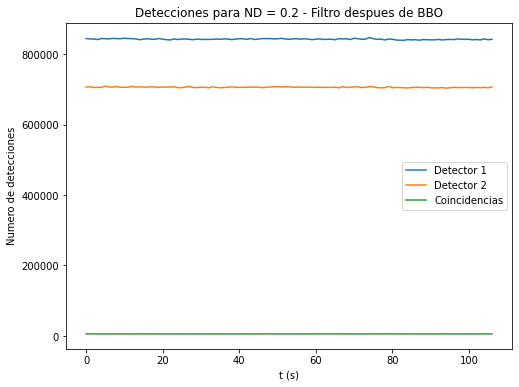

In [26]:
figure(figsize=(8,6))
plot(TFs[0],dF1[0], label = 'Detector 1')
plot(TFs[0],dF2[0], label = 'Detector 2')
plot(TFs[0],cF[0], label = 'Coincidencias')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Detecciones para ND = 0.2 - Filtro despues de BBO')
legend()
savefig('Detecciones_Filtro')

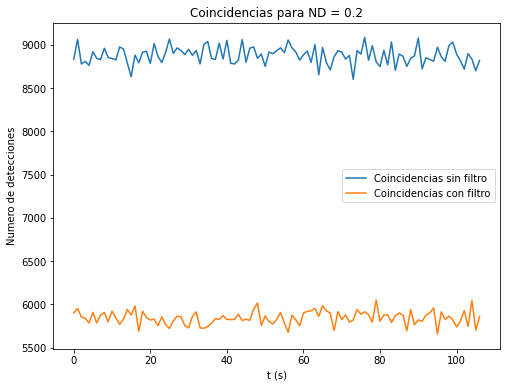

In [27]:
figure(figsize=(8,6))
plot(Ts[0],c[0], label = 'Coincidencias sin filtro')
plot(TFs[0],cF[0], label = 'Coincidencias con filtro')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Coincidencias para ND = 0.2')
legend()
savefig('Coincidencias_F_y_NF')

In [28]:
singles1F = []
singles2F = []
CoinF = []
for i in range(len(ND)):
    singles1F.append(mean(dF1[i]))
    singles2F.append(mean(dF2[i]))
    CoinF.append(sum(PcoinF[i]))

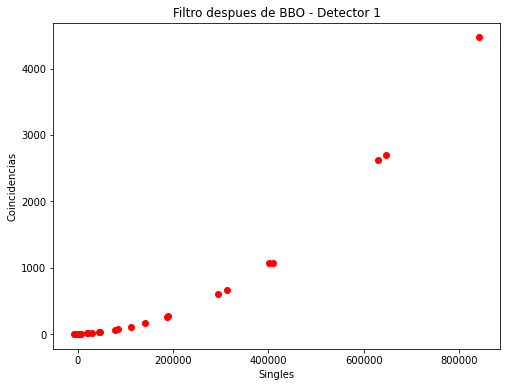

In [29]:
figure(figsize=(8,6))
# plot(singles1F, CoinF, c = 'b')
scatter(singles1F, CoinF, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro despues de BBO - Detector 1')
savefig('Singles1Vcoin_Filter')

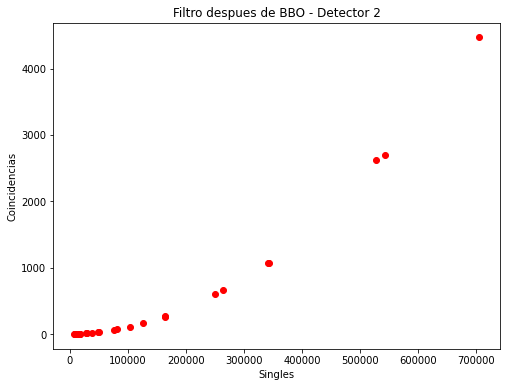

In [30]:
figure(figsize=(8,6))
# plot(singles2F, CoinF, c = 'b')
scatter(singles2F, CoinF, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro despues de BBO - Detector 2')
savefig('Singles2Vcoin_Filter')

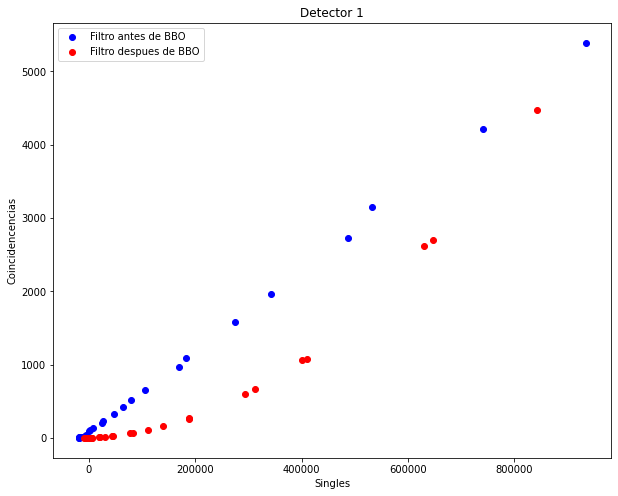

In [31]:
# for i in range(len(ND)):
#     scatter(singles1[i], Coin[i], label = '.%1f' %(ND[i]))
#     scatter(singles1F[i], CoinF[i], label = '.%1f' %(ND[i]))
figure(figsize=(10,8))
scatter(singles1, Coin, label = 'Filtro antes de BBO', c = 'b')
scatter(singles1F, CoinF, label = 'Filtro despues de BBO', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 1')
savefig('Singles1Vcoin')

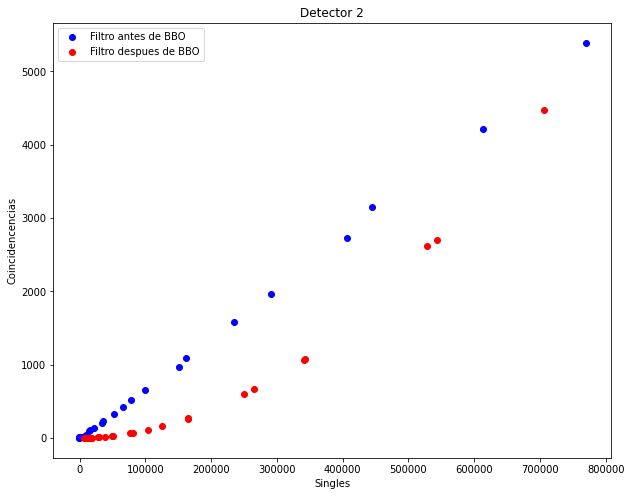

In [32]:
figure(figsize=(10,8))
scatter(singles2, Coin, label = 'Filtro antes de BBO', c = 'b')
scatter(singles2F, CoinF, label = 'Filtro despues de BBO', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 2')
savefig('Singles2Vcoin')

# **RhB**

In [33]:
data02 = pd.read_csv('0_2_CoincidenciasR.csv') #Carga datos
data03 = pd.read_csv('0_3_CoincidenciasR.csv')
data04 = pd.read_csv('0_4_CoincidenciasR.csv')
data05 = pd.read_csv('0_5_CoincidenciasR.csv')
data06 = pd.read_csv('0_6_CoincidenciasR.csv')
data07 = pd.read_csv('0_7_CoincidenciasR.csv')
data08 = pd.read_csv('0_8_CoincidenciasR.csv')
data09 = pd.read_csv('0_9_CoincidenciasR.csv')
data10 = pd.read_csv('1_0_CoincidenciasR.csv')
data11 = pd.read_csv('1_1_CoincidenciasR.csv')
data12 = pd.read_csv('1_2_CoincidenciasR.csv')
data13 = pd.read_csv('1_3_CoincidenciasR.csv')
data14 = pd.read_csv('1_4_CoincidenciasR.csv')
data15 = pd.read_csv('1_5_CoincidenciasR.csv')
data16 = pd.read_csv('1_6_CoincidenciasR.csv')
data17 = pd.read_csv('1_7_CoincidenciasR.csv')
data18 = pd.read_csv('1_8_CoincidenciasR.csv')
data19 = pd.read_csv('1_9_CoincidenciasR.csv')
data20 = pd.read_csv('2_0_CoincidenciasR.csv')
data21 = pd.read_csv('2_1_CoincidenciasR.csv')
data22 = pd.read_csv('2_2_CoincidenciasR.csv')
data23 = pd.read_csv('2_3_CoincidenciasR.csv')
data24 = pd.read_csv('2_4_CoincidenciasR.csv')
data25 = pd.read_csv('2_5_CoincidenciasR.csv')
data26 = pd.read_csv('2_6_CoincidenciasR.csv')
data27 = pd.read_csv('2_7_CoincidenciasR.csv')

In [34]:
ND = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7]
TR = np.array([data02['t (s) - HBT Measurement'],data03['t (s) - HBT Measurement'],data04['t (s) - HBT Measurement'],data05['t (s) - HBT Measurement'],data06['t (s) - HBT Measurement'],data07['t (s) - HBT Measurement'],data08['t (s) - HBT Measurement'],data09['t (s) - HBT Measurement'],data10['t (s) - HBT Measurement'],data11['t (s) - HBT Measurement'],data12['t (s) - HBT Measurement'],data13['t (s) - HBT Measurement'],data14['t (s) - HBT Measurement'],data15['t (s) - HBT Measurement'],data16['t (s) - HBT Measurement'],data17['t (s) - HBT Measurement'],data18['t (s) - HBT Measurement'],data19['t (s) - HBT Measurement'],data20['t (s) - HBT Measurement'],data21['t (s) - HBT Measurement'],data22['t (s) - HBT Measurement'],data23['t (s) - HBT Measurement'],data24['t (s) - HBT Measurement'],data25['t (s) - HBT Measurement'],data26['t (s) - HBT Measurement'],data27['t (s) - HBT Measurement']])
tR = []
for i in range(shape(TR)[0]):
    tc = [0]
    for j in TR[i][1:]:
        if j[-1] == 'p': #pasa de ps a ns
            tc.append(float(j[:-1:].replace(',','.'))/1000)    
        else:
            tc.append(float(j[:-1:].replace(',','.')))
    tR.append(tc)

In [35]:
# N = np.array([50*data02['Start-Stop Historam (events per second) - HBT Measurement'],50*data03['Start-Stop Historam (events per second) - HBT Measurement'],50*data04['Start-Stop Historam (events per second) - HBT Measurement'],50*data05['Start-Stop Historam (events per second) - HBT Measurement'],50*data06['Start-Stop Historam (events per second) - HBT Measurement'],50*data07['Start-Stop Historam (events per second) - HBT Measurement'],data08['Start-Stop Historam (events per second) - HBT Measurement'],data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
NR = np.array([data02['Start-Stop Historam (events per second) - HBT Measurement'],data03['Start-Stop Historam (events per second) - HBT Measurement'],data04['Start-Stop Historam (events per second) - HBT Measurement'],data05['Start-Stop Historam (events per second) - HBT Measurement'],data06['Start-Stop Historam (events per second) - HBT Measurement'],data07['Start-Stop Historam (events per second) - HBT Measurement'],data08['Start-Stop Historam (events per second) - HBT Measurement'],data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
nR = []
for i in range(shape(NR)[0]):
    nc = []
    for j in NR[i]:
        nc.append(j)
    nR.append(nc)

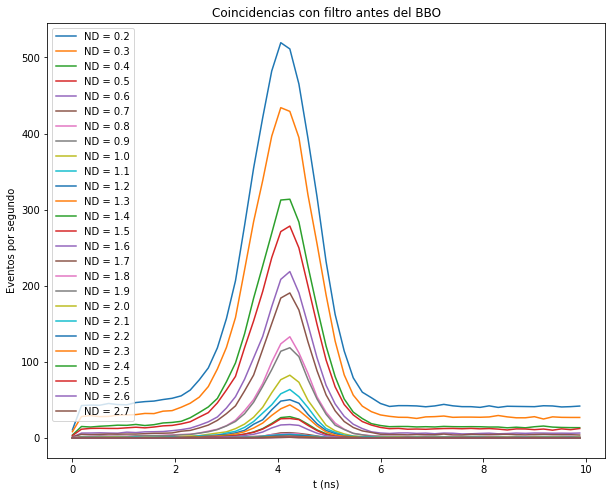

In [36]:
figure(figsize=(10,8))
for i in range(len(ND)):
    plot(tR[i],nR[i], label = 'ND = %.1f' %(ND[i]))
    legend()
    xlabel('t (ns)')
    ylabel('Eventos por segundo')
    title('Coincidencias con filtro antes del BBO')
savefig('Counts_W')

In [37]:
PtauR = []
PcoinR = []
for i in range(len(ND)):
    ct = []
    cc = []
    m_index = nR[i].index(max(nR[i]))
    tau = np.std(tR[i])
    x = linspace(tR[i][m_index]-tau/2,tR[i][m_index]+tau/2,10)
    I = []
    C = []
    for j in tR[i]:
        if abs(tR[i][m_index] - j) < tau/2:
            ct.append(j)
            cc.append(nR[i][tR[i].index(j)])
    for k in x:
        d = abs(k-np.array(ct)).tolist()
        I.append(ct[d.index(min(d))])
        C.append(cc[d.index(min(d))])

    PtauR.append(I)
    PcoinR.append(C)

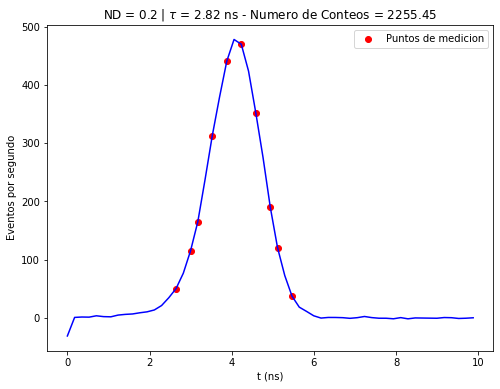

In [38]:
figure(figsize=(8,6))
plot(tR[0],nR[0]-mean(nR[0][-11:-1]), c = 'b')
scatter(PtauR[0],PcoinR[0]-mean(nR[0][-11:-1]), c = 'r', label = 'Puntos de medicion')
title(r'ND = 0.2 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(PtauR[0][-1]-PtauR[0][0],sum(PcoinR[0]-mean(nR[0][-11:-1]))))
xlabel('t (ns)')
ylabel('Eventos por segundo')
legend()
savefig('Sum_first')

In [39]:
data02 = pd.read_csv('0_2_CoincidenciasRB.csv') #Carga datos
data03 = pd.read_csv('0_3_CoincidenciasRB.csv')
data04 = pd.read_csv('0_4_CoincidenciasRB.csv')
data05 = pd.read_csv('0_5_CoincidenciasRB.csv')
data06 = pd.read_csv('0_6_CoincidenciasRB.csv')
data07 = pd.read_csv('0_7_CoincidenciasRB.csv')
data08 = pd.read_csv('0_8_CoincidenciasRB.csv')
data09 = pd.read_csv('0_9_CoincidenciasRB.csv')
data10 = pd.read_csv('1_0_CoincidenciasRB.csv')
data11 = pd.read_csv('1_1_CoincidenciasRB.csv')
data12 = pd.read_csv('1_2_CoincidenciasRB.csv')
data13 = pd.read_csv('1_3_CoincidenciasRB.csv')
data14 = pd.read_csv('1_4_CoincidenciasRB.csv')
data15 = pd.read_csv('1_5_CoincidenciasRB.csv')
data16 = pd.read_csv('1_6_CoincidenciasRB.csv')
data17 = pd.read_csv('1_7_CoincidenciasRB.csv')
data18 = pd.read_csv('1_8_CoincidenciasRB.csv')
data19 = pd.read_csv('1_9_CoincidenciasRB.csv')
data20 = pd.read_csv('2_0_CoincidenciasRB.csv')
data21 = pd.read_csv('2_1_CoincidenciasRB.csv')
data22 = pd.read_csv('2_2_CoincidenciasRB.csv')
data23 = pd.read_csv('2_3_CoincidenciasRB.csv')
data24 = pd.read_csv('2_4_CoincidenciasRB.csv')
data25 = pd.read_csv('2_5_CoincidenciasRB.csv')
data26 = pd.read_csv('2_6_CoincidenciasRB.csv')
data27 = pd.read_csv('2_7_CoincidenciasRB.csv')

In [40]:
TRF = np.array([data02['t (s) - HBT Measurement'],data03['t (s) - HBT Measurement'],data04['t (s) - HBT Measurement'],data05['t (s) - HBT Measurement'],data06['t (s) - HBT Measurement'],data07['t (s) - HBT Measurement'],data08['t (s) - HBT Measurement'],data09['t (s) - HBT Measurement'],data10['t (s) - HBT Measurement'],data11['t (s) - HBT Measurement'],data12['t (s) - HBT Measurement'],data13['t (s) - HBT Measurement'],data14['t (s) - HBT Measurement'],data15['t (s) - HBT Measurement'],data16['t (s) - HBT Measurement'],data17['t (s) - HBT Measurement'],data18['t (s) - HBT Measurement'],data19['t (s) - HBT Measurement'],data20['t (s) - HBT Measurement'],data21['t (s) - HBT Measurement'],data22['t (s) - HBT Measurement'],data23['t (s) - HBT Measurement'],data24['t (s) - HBT Measurement'],data25['t (s) - HBT Measurement'],data26['t (s) - HBT Measurement'],data27['t (s) - HBT Measurement']])
tRF = []
for i in range(shape(TRF)[0]):
    tc = [0]
    for j in TRF[i][1:]:
        if j[-1] == 'p': #pasa de ps a ns
            tc.append(float(j[:-1:].replace(',','.'))/1000)    
        else:
            tc.append(float(j[:-1:].replace(',','.')))
    tRF.append(tc)

In [41]:
# NF = np.array([150*data02['Start-Stop Historam (events per second) - HBT Measurement'],150*data03['Start-Stop Historam (events per second) - HBT Measurement'],150*data04['Start-Stop Historam (events per second) - HBT Measurement'],150*data05['Start-Stop Historam (events per second) - HBT Measurement'],150*data06['Start-Stop Historam (events per second) - HBT Measurement'],150*data07['Start-Stop Historam (events per second) - HBT Measurement'],150*data08['Start-Stop Historam (events per second) - HBT Measurement'],150*data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
NRF = np.array([data02['Start-Stop Historam (events per second) - HBT Measurement'],data03['Start-Stop Historam (events per second) - HBT Measurement'],data04['Start-Stop Historam (events per second) - HBT Measurement'],data05['Start-Stop Historam (events per second) - HBT Measurement'],data06['Start-Stop Historam (events per second) - HBT Measurement'],data07['Start-Stop Historam (events per second) - HBT Measurement'],data08['Start-Stop Historam (events per second) - HBT Measurement'],data09['Start-Stop Historam (events per second) - HBT Measurement'],data10['Start-Stop Historam (events per second) - HBT Measurement'],data11['Start-Stop Historam (events per second) - HBT Measurement'],data12['Start-Stop Historam (events per second) - HBT Measurement'],data13['Start-Stop Historam (events per second) - HBT Measurement'],data14['Start-Stop Historam (events per second) - HBT Measurement'],data15['Start-Stop Historam (events per second) - HBT Measurement'],data16['Start-Stop Historam (events per second) - HBT Measurement'],data17['Start-Stop Historam (events per second) - HBT Measurement'],data18['Start-Stop Historam (events per second) - HBT Measurement'],data19['Start-Stop Historam (events per second) - HBT Measurement'],data20['Start-Stop Historam (events per second) - HBT Measurement'],data21['Start-Stop Historam (events per second) - HBT Measurement'],data22['Start-Stop Historam (events per second) - HBT Measurement'],data23['Start-Stop Historam (events per second) - HBT Measurement'],data24['Start-Stop Historam (events per second) - HBT Measurement'],data25['Start-Stop Historam (events per second) - HBT Measurement'],data26['Start-Stop Historam (events per second) - HBT Measurement'],data27['Start-Stop Historam (events per second) - HBT Measurement']])
nRF = []
for i in range(shape(NRF)[0]):
    nc = []
    for j in NRF[i]:
        nc.append(j)
    nRF.append(nc)

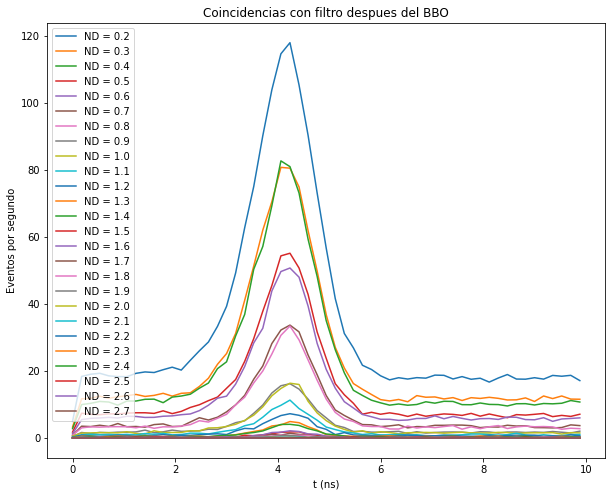

In [42]:
figure(figsize=(10,8))
for i in range(len(ND)):
    plot(tRF[i],nRF[i], label = 'ND = %.1f' %(ND[i]))
    legend()
    xlabel('t (ns)')
    ylabel('Eventos por segundo')
    title('Coincidencias con filtro despues del BBO')
savefig('CountsF')

In [43]:
PtauRF = []
PcoinRF = []
for i in range(len(ND)):
    ct = []
    cc = []
    m_index = nRF[i].index(max(nRF[i]))
    tau = np.std(tRF[i])
    x = linspace(tRF[i][m_index]-tau/2,tRF[i][m_index]+tau/2,10)
    I = []
    C = []
    for j in tRF[i]:
        if abs(tRF[i][m_index] - j) < tau/2:
            ct.append(j)
            cc.append(nRF[i][tRF[i].index(j)])
    for k in x:
        d = abs(k-np.array(ct)).tolist()
        I.append(ct[d.index(min(d))])
        C.append(cc[d.index(min(d))])

    PtauRF.append(I)
    PcoinRF.append(C)

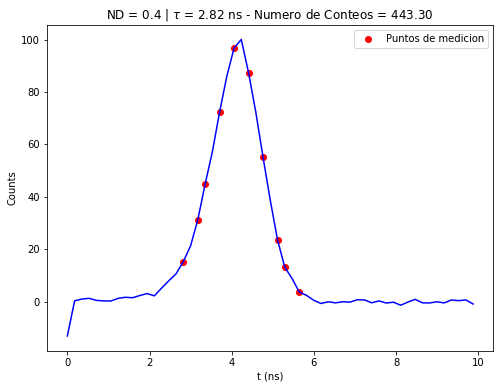

In [44]:
figure(figsize=(8,6))
plot(tRF[0],nRF[0]-mean(nRF[0][-11:-1]), c = 'b')
scatter(PtauRF[0],PcoinRF[0]-mean(nRF[0][-11:-1]), c = 'r', label = 'Puntos de medicion')
title(r'ND = 0.4 | $\tau$ = {:.2f} ns - Numero de Conteos = {:.2f}'.format(PtauRF[0][-1]-PtauRF[0][0],sum(PcoinRF[0]-mean(nRF[0][-11:-1]))))
xlabel('t (ns)')
ylabel('Counts')
legend()

In [45]:
data02 = pd.read_csv('0_2_ConteosR.csv') #Carga datos
data03 = pd.read_csv('0_3_ConteosR.csv')
data04 = pd.read_csv('0_4_ConteosR.csv')
data05 = pd.read_csv('0_5_ConteosR.csv')
data06 = pd.read_csv('0_6_ConteosR.csv')
data07 = pd.read_csv('0_7_ConteosR.csv')
data08 = pd.read_csv('0_8_ConteosR.csv')
data09 = pd.read_csv('0_9_ConteosR.csv')
data10 = pd.read_csv('1_0_ConteosR.csv')
data11 = pd.read_csv('1_1_ConteosR.csv')
data12 = pd.read_csv('1_2_ConteosR.csv')
data13 = pd.read_csv('1_3_ConteosR.csv')
data14 = pd.read_csv('1_4_ConteosR.csv')
data15 = pd.read_csv('1_5_ConteosR.csv')
data16 = pd.read_csv('1_6_ConteosR.csv')
data17 = pd.read_csv('1_7_ConteosR.csv')
data18 = pd.read_csv('1_8_ConteosR.csv')
data19 = pd.read_csv('1_9_ConteosR.csv')
data20 = pd.read_csv('2_0_ConteosR.csv')
data21 = pd.read_csv('2_1_ConteosR.csv')
data22 = pd.read_csv('2_2_ConteosR.csv')
data23 = pd.read_csv('2_3_ConteosR.csv')
data24 = pd.read_csv('2_4_ConteosR.csv')
data25 = pd.read_csv('2_5_ConteosR.csv')
data26 = pd.read_csv('2_6_ConteosR.csv')
data27 = pd.read_csv('2_7_ConteosR.csv')
dark = pd.read_csv('Dark.csv')

In [46]:
b1 = dark['Count rates (per second) - Singles 1']
b2 = dark['Count rates (per second) - Singles 2']
B1 = []
B2 = []
for i in range(len(b1)):
    B1.append(float(b1[i][:-1:].replace(',','.'))*1000)
    B2.append(float(b2[i][:-1:].replace(',','.'))*1000)

In [47]:
N1 = mean(B1)
N2 = mean(B2)

In [48]:
TRs = [data02['Time - Singles 1'],data03['Time - Singles 1'],data04['Time - Singles 1'],data05['Time - Singles 1'],data06['Time - Singles 1'],data07['Time - Singles 1'],data08['Time - Singles 1'],data09['Time - Singles 1'],data10['Time - Singles 1'],data11['Time - Singles 1'],data12['Time - Singles 1'],data13['Time - Singles 1'],data14['Time - Singles 1'],data15['Time - Singles 1'],data16['Time - Singles 1'],data17['Time - Singles 1'],data18['Time - Singles 1'],data19['Time - Singles 1'],data20['Time - Singles 1'],data21['Time - Singles 1'],data22['Time - Singles 1'],data23['Time - Singles 1'],data24['Time - Singles 1'],data25['Time - Singles 1'],data26['Time - Singles 1'],data27['Time - Singles 1']]
for i in range(len(TRs)):
    TRs[i] = TRs[i]-TRs[i][0]
DR1 = [data02['Count rates (per second) - Singles 1'],data03['Count rates (per second) - Singles 1'],data04['Count rates (per second) - Singles 1'],data05['Count rates (per second) - Singles 1'],data06['Count rates (per second) - Singles 1'],data07['Count rates (per second) - Singles 1'],data08['Count rates (per second) - Singles 1'],data09['Count rates (per second) - Singles 1'],data10['Count rates (per second) - Singles 1'],data11['Count rates (per second) - Singles 1'],data12['Count rates (per second) - Singles 1'],data13['Count rates (per second) - Singles 1'],data14['Count rates (per second) - Singles 1'],data15['Count rates (per second) - Singles 1'],data16['Count rates (per second) - Singles 1'],data17['Count rates (per second) - Singles 1'],data18['Count rates (per second) - Singles 1'],data19['Count rates (per second) - Singles 1'],data20['Count rates (per second) - Singles 1'],data21['Count rates (per second) - Singles 1'],data22['Count rates (per second) - Singles 1'],data23['Count rates (per second) - Singles 1'],data24['Count rates (per second) - Singles 1'],data25['Count rates (per second) - Singles 1'],data26['Count rates (per second) - Singles 1'],data27['Count rates (per second) - Singles 1']]
dR1 = []
DR2 = [data02['Count rates (per second) - Singles 2'],data03['Count rates (per second) - Singles 2'],data04['Count rates (per second) - Singles 2'],data05['Count rates (per second) - Singles 2'],data06['Count rates (per second) - Singles 2'],data07['Count rates (per second) - Singles 2'],data08['Count rates (per second) - Singles 2'],data09['Count rates (per second) - Singles 2'],data10['Count rates (per second) - Singles 2'],data11['Count rates (per second) - Singles 2'],data12['Count rates (per second) - Singles 2'],data13['Count rates (per second) - Singles 2'],data14['Count rates (per second) - Singles 2'],data15['Count rates (per second) - Singles 2'],data16['Count rates (per second) - Singles 2'],data17['Count rates (per second) - Singles 2'],data18['Count rates (per second) - Singles 2'],data19['Count rates (per second) - Singles 2'],data20['Count rates (per second) - Singles 2'],data21['Count rates (per second) - Singles 2'],data22['Count rates (per second) - Singles 2'],data23['Count rates (per second) - Singles 2'],data24['Count rates (per second) - Singles 2'],data25['Count rates (per second) - Singles 2'],data26['Count rates (per second) - Singles 2'],data27['Count rates (per second) - Singles 2']]
dR2 = []
CR = [data02['Count rates (per second) - Coinc 1+2'],data03['Count rates (per second) - Coinc 1+2'],data04['Count rates (per second) - Coinc 1+2'],data05['Count rates (per second) - Coinc 1+2'],data06['Count rates (per second) - Coinc 1+2'],data07['Count rates (per second) - Coinc 1+2'],data08['Count rates (per second) - Coinc 1+2'],data09['Count rates (per second) - Coinc 1+2'],data10['Count rates (per second) - Coinc 1+2'],data11['Count rates (per second) - Coinc 1+2'],data12['Count rates (per second) - Coinc 1+2'],data13['Count rates (per second) - Coinc 1+2'],data14['Count rates (per second) - Coinc 1+2'],data15['Count rates (per second) - Coinc 1+2'],data16['Count rates (per second) - Coinc 1+2'],data17['Count rates (per second) - Coinc 1+2'],data18['Count rates (per second) - Coinc 1+2'],data19['Count rates (per second) - Coinc 1+2'],data20['Count rates (per second) - Coinc 1+2'],data21['Count rates (per second) - Coinc 1+2'],data22['Count rates (per second) - Coinc 1+2'],data23['Count rates (per second) - Coinc 1+2'],data24['Count rates (per second) - Coinc 1+2'],data25['Count rates (per second) - Coinc 1+2'],data26['Count rates (per second) - Coinc 1+2'],data27['Count rates (per second) - Coinc 1+2']]
cR = []
for i in range(len(DR1)):
    dc1 = []
    dc2 = []
    cc = []
    for j in DR1[i]:
        dc1.append(float(j[:-1:].replace(',','.'))*1000)
    for j in DR2[i]:
        dc2.append(float(j[:-1:].replace(',','.'))*1000)
    for j in CR[i]:
        if type(j) == str:
            cc.append(float(j[:-1:].replace(',','.'))*1000)
        else:
            cc.append(j)
    dR1.append(dc1-N1)
    dR2.append(dc2-N2)
    cR.append(cc)

In [49]:
# for i in range(6):
#     d1[i] = 10*d1[i]
#     d2[i] = 10*d2[i]

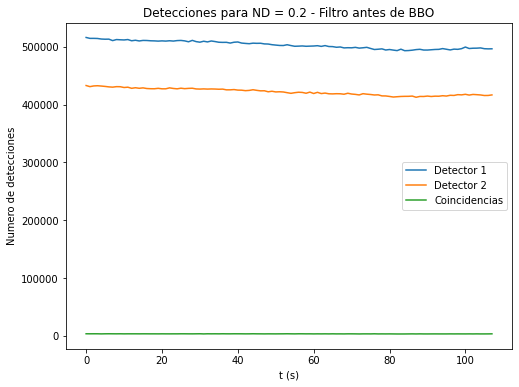

In [50]:
figure(figsize=(8,6))
plot(TRs[0],dR1[0], label = 'Detector 1')
plot(TRs[0],dR2[0], label = 'Detector 2')
plot(TRs[0],cR[0], label = 'Coincidencias')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Detecciones para ND = 0.2 - Filtro antes de BBO')
legend()
savefig('Detecciones')

In [51]:
singles1R = []
singles2R = []
CoinR = []
for i in range(len(ND)):
    singles1R.append(mean(dR1[i]))
    singles2R.append(mean(dR2[i]))
    CoinR.append(sum(PcoinR[i]-mean(nR[i][-11:-1]))) 

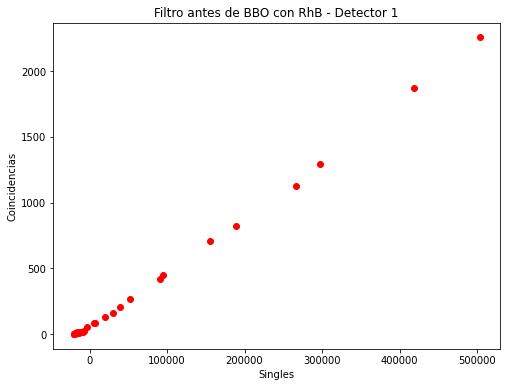

In [52]:
figure(figsize=(8,6))
# plot(singles1, Coin, c = 'b')
scatter(singles1R, CoinR, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro antes de BBO con RhB - Detector 1')
savefig('Singles1Vcoin_NoFilter')

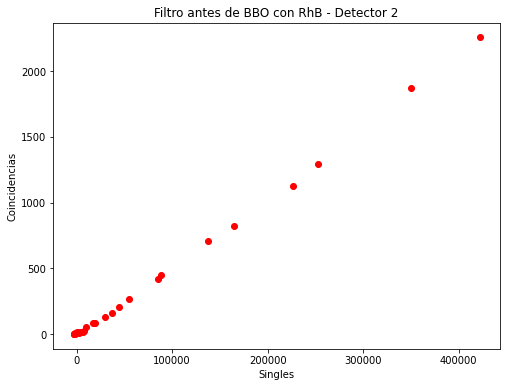

In [53]:
figure(figsize=(8,6))
# plot(singles2, Coin, c = 'b')
scatter(singles2R, CoinR, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro antes de BBO con RhB - Detector 2')
savefig('Singles2Vcoin_NoFilter')

In [54]:
data02 = pd.read_csv('0_2_ConteosRB.csv') #Carga datos
data03 = pd.read_csv('0_3_ConteosRB.csv')
data04 = pd.read_csv('0_4_ConteosRB.csv')
data05 = pd.read_csv('0_5_ConteosRB.csv')
data06 = pd.read_csv('0_6_ConteosRB.csv')
data07 = pd.read_csv('0_7_ConteosRB.csv')
data08 = pd.read_csv('0_8_ConteosRB.csv')
data09 = pd.read_csv('0_9_ConteosRB.csv')
data10 = pd.read_csv('1_0_ConteosRB.csv')
data11 = pd.read_csv('1_1_ConteosRB.csv')
data12 = pd.read_csv('1_2_ConteosRB.csv')
data13 = pd.read_csv('1_3_ConteosRB.csv')
data14 = pd.read_csv('1_4_ConteosRB.csv')
data15 = pd.read_csv('1_5_ConteosRB.csv')
data16 = pd.read_csv('1_6_ConteosRB.csv')
data17 = pd.read_csv('1_7_ConteosRB.csv')
data18 = pd.read_csv('1_8_ConteosRB.csv')
data19 = pd.read_csv('1_9_ConteosRB.csv')
data20 = pd.read_csv('2_0_ConteosRB.csv')
data21 = pd.read_csv('2_1_ConteosRB.csv')
data22 = pd.read_csv('2_2_ConteosRB.csv')
data23 = pd.read_csv('2_3_ConteosRB.csv')
data24 = pd.read_csv('2_4_ConteosRB.csv')
data25 = pd.read_csv('2_5_ConteosRB.csv')
data26 = pd.read_csv('2_6_ConteosRB.csv')
data27 = pd.read_csv('2_7_ConteosRB.csv')

In [55]:
TFRs = [data02['Time - Singles 1'],data03['Time - Singles 1'],data04['Time - Singles 1'],data05['Time - Singles 1'],data06['Time - Singles 1'],data07['Time - Singles 1'],data08['Time - Singles 1'],data09['Time - Singles 1'],data10['Time - Singles 1'],data11['Time - Singles 1'],data12['Time - Singles 1'],data13['Time - Singles 1'],data14['Time - Singles 1'],data15['Time - Singles 1'],data16['Time - Singles 1'],data17['Time - Singles 1'],data18['Time - Singles 1'],data19['Time - Singles 1'],data20['Time - Singles 1'],data21['Time - Singles 1'],data22['Time - Singles 1'],data23['Time - Singles 1'],data24['Time - Singles 1'],data25['Time - Singles 1'],data26['Time - Singles 1'],data27['Time - Singles 1']]
for i in range(len(TFRs)):
    TFRs[i] = TFRs[i]-TFRs[i][0]
DFR1 = [data02['Count rates (per second) - Singles 1'],data03['Count rates (per second) - Singles 1'],data04['Count rates (per second) - Singles 1'],data05['Count rates (per second) - Singles 1'],data06['Count rates (per second) - Singles 1'],data07['Count rates (per second) - Singles 1'],data08['Count rates (per second) - Singles 1'],data09['Count rates (per second) - Singles 1'],data10['Count rates (per second) - Singles 1'],data11['Count rates (per second) - Singles 1'],data12['Count rates (per second) - Singles 1'],data13['Count rates (per second) - Singles 1'],data14['Count rates (per second) - Singles 1'],data15['Count rates (per second) - Singles 1'],data16['Count rates (per second) - Singles 1'],data17['Count rates (per second) - Singles 1'],data18['Count rates (per second) - Singles 1'],data19['Count rates (per second) - Singles 1'],data20['Count rates (per second) - Singles 1'],data21['Count rates (per second) - Singles 1'],data22['Count rates (per second) - Singles 1'],data23['Count rates (per second) - Singles 1'],data24['Count rates (per second) - Singles 1'],data25['Count rates (per second) - Singles 1'],data26['Count rates (per second) - Singles 1'],data27['Count rates (per second) - Singles 1']]
dFR1 = []
DFR2 = [data02['Count rates (per second) - Singles 2'],data03['Count rates (per second) - Singles 2'],data04['Count rates (per second) - Singles 2'],data05['Count rates (per second) - Singles 2'],data06['Count rates (per second) - Singles 2'],data07['Count rates (per second) - Singles 2'],data08['Count rates (per second) - Singles 2'],data09['Count rates (per second) - Singles 2'],data10['Count rates (per second) - Singles 2'],data11['Count rates (per second) - Singles 2'],data12['Count rates (per second) - Singles 2'],data13['Count rates (per second) - Singles 2'],data14['Count rates (per second) - Singles 2'],data15['Count rates (per second) - Singles 2'],data16['Count rates (per second) - Singles 2'],data17['Count rates (per second) - Singles 2'],data18['Count rates (per second) - Singles 2'],data19['Count rates (per second) - Singles 2'],data20['Count rates (per second) - Singles 2'],data21['Count rates (per second) - Singles 2'],data22['Count rates (per second) - Singles 2'],data23['Count rates (per second) - Singles 2'],data24['Count rates (per second) - Singles 2'],data25['Count rates (per second) - Singles 2'],data26['Count rates (per second) - Singles 2'],data27['Count rates (per second) - Singles 2']]
dFR2 = []
CFR = [data02['Count rates (per second) - Coinc 1+2'],data03['Count rates (per second) - Coinc 1+2'],data04['Count rates (per second) - Coinc 1+2'],data05['Count rates (per second) - Coinc 1+2'],data06['Count rates (per second) - Coinc 1+2'],data07['Count rates (per second) - Coinc 1+2'],data08['Count rates (per second) - Coinc 1+2'],data09['Count rates (per second) - Coinc 1+2'],data10['Count rates (per second) - Coinc 1+2'],data11['Count rates (per second) - Coinc 1+2'],data12['Count rates (per second) - Coinc 1+2'],data13['Count rates (per second) - Coinc 1+2'],data14['Count rates (per second) - Coinc 1+2'],data15['Count rates (per second) - Coinc 1+2'],data16['Count rates (per second) - Coinc 1+2'],data17['Count rates (per second) - Coinc 1+2'],data18['Count rates (per second) - Coinc 1+2'],data19['Count rates (per second) - Coinc 1+2'],data20['Count rates (per second) - Coinc 1+2'],data21['Count rates (per second) - Coinc 1+2'],data22['Count rates (per second) - Coinc 1+2'],data23['Count rates (per second) - Coinc 1+2'],data24['Count rates (per second) - Coinc 1+2'],data25['Count rates (per second) - Coinc 1+2'],data26['Count rates (per second) - Coinc 1+2'],data27['Count rates (per second) - Coinc 1+2']]
cFR = []
for i in range(len(DFR1)):
    dc1 = []
    dc2 = []
    cc = []
    for j in DFR1[i]:
        dc1.append(float(j[:-1:].replace(',','.'))*1000)
    for j in DFR2[i]:
        dc2.append(float(j[:-1:].replace(',','.'))*1000)
    for j in CFR[i]:
        if type(j) == str:
            cc.append(float(j[:-1:].replace(',','.'))*1000)
        else:
            cc.append(float(j))
    dFR1.append(dc1-N1)
    dFR2.append(dc2-N2)
    cFR.append(cc)

In [56]:
# for i in range(8):
#     dF1[i] = 10*dF1[i]
#     dF2[i] = 10*dF2[i]
#     cF[i] = 150*np.array(cF[i])

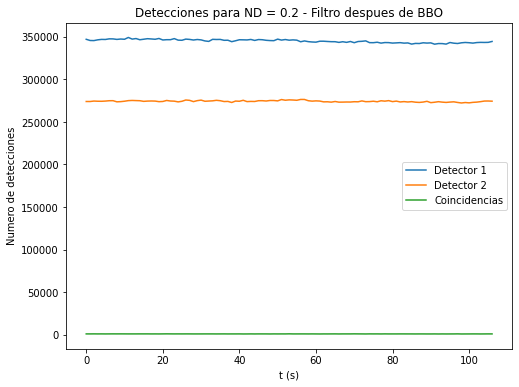

In [57]:
figure(figsize=(8,6))
plot(TFRs[0],dFR1[0], label = 'Detector 1')
plot(TFRs[0],dFR2[0], label = 'Detector 2')
plot(TFRs[0],cFR[0], label = 'Coincidencias')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Detecciones para ND = 0.2 - Filtro despues de BBO')
legend()
savefig('Detecciones_Filtro')

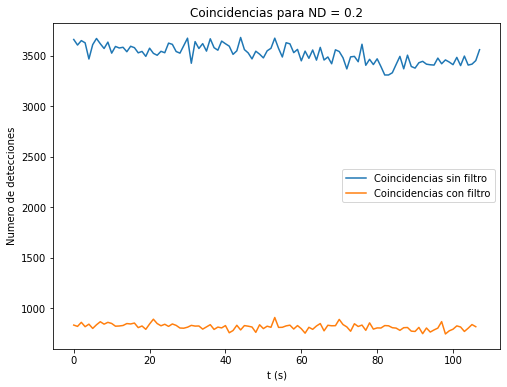

In [58]:
figure(figsize=(8,6))
plot(TRs[0],cR[0], label = 'Coincidencias sin filtro')
plot(TFRs[0],cFR[0], label = 'Coincidencias con filtro')
xlabel('t (s)')
ylabel('Numero de detecciones')
title('Coincidencias para ND = 0.2')
legend()
savefig('Coincidencias_F_y_NF')

In [59]:
singles1FR = []
singles2FR = []
CoinFR = []
for i in range(len(ND)):
    singles1FR.append(mean(dFR1[i]))
    singles2FR.append(mean(dFR2[i]))
    CoinFR.append(sum(PcoinRF[i]))

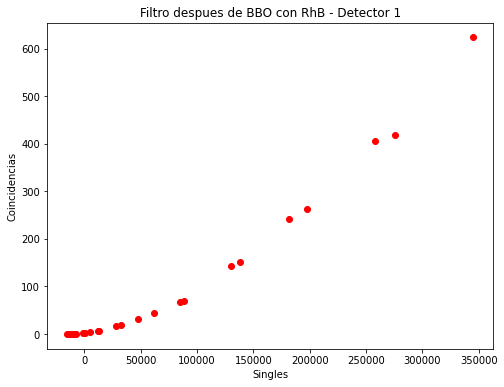

In [60]:
figure(figsize=(8,6))
# plot(singles1F, CoinF, c = 'b')
scatter(singles1FR, CoinFR, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro despues de BBO con RhB - Detector 1')
savefig('Singles1Vcoin_Filter')

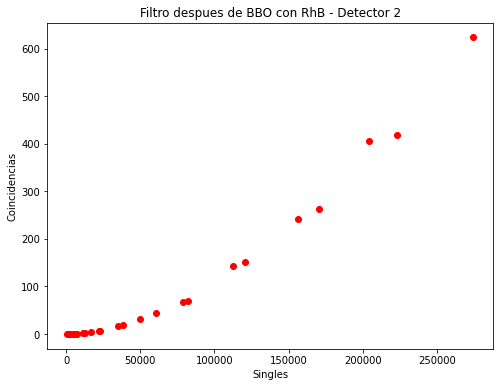

In [61]:
figure(figsize=(8,6))
# plot(singles2F, CoinF, c = 'b')
scatter(singles2FR, CoinFR, c = 'r')
xlabel('Singles')
ylabel('Coincidencias')
title('Filtro despues de BBO con RhB - Detector 2')
savefig('Singles2Vcoin_Filter')

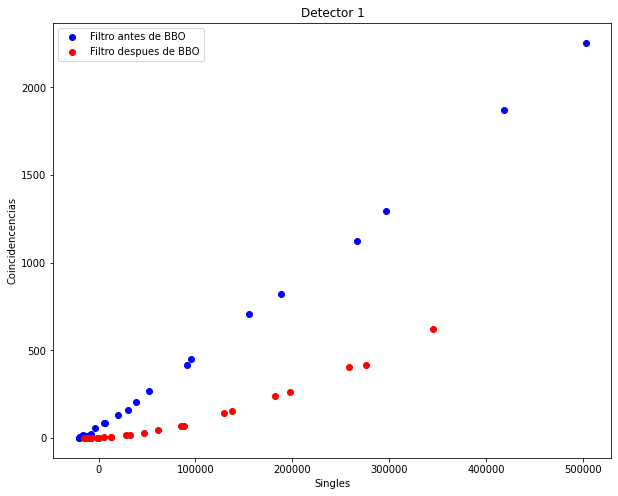

In [62]:
# for i in range(len(ND)):
#     scatter(singles1[i], Coin[i], label = '.%1f' %(ND[i]))
#     scatter(singles1F[i], CoinF[i], label = '.%1f' %(ND[i]))
figure(figsize=(10,8))
scatter(singles1R, CoinR, label = 'Filtro antes de BBO', c = 'b')
scatter(singles1FR, CoinFR, label = 'Filtro despues de BBO', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 1')
savefig('Singles1VcoinR')

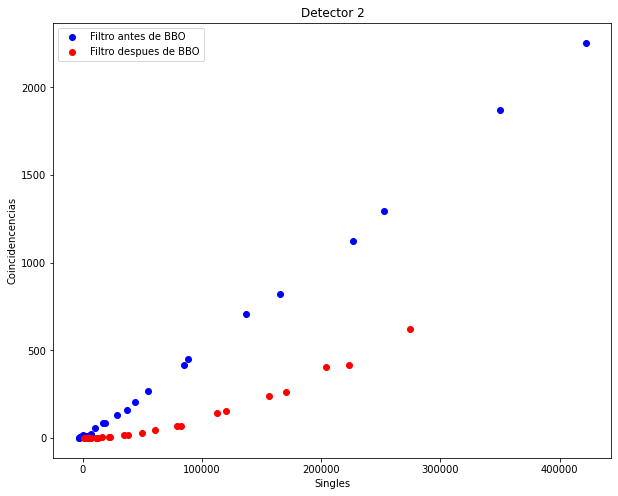

In [63]:
figure(figsize=(10,8))
scatter(singles2R, CoinR, label = 'Filtro antes de BBO', c = 'b')
scatter(singles2FR, CoinFR, label = 'Filtro despues de BBO', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 2')
savefig('Singles2Vcoin')

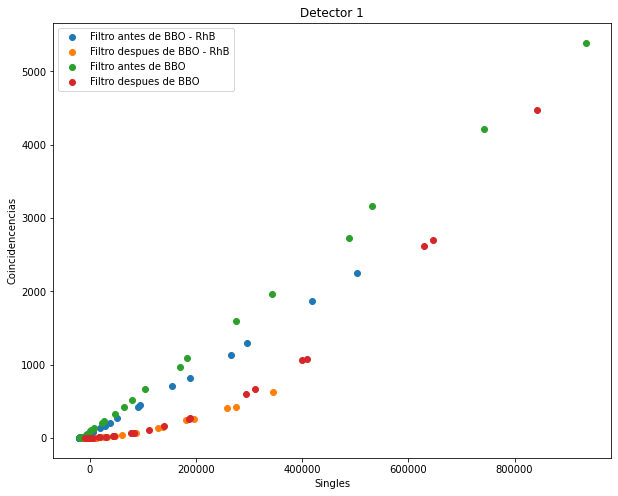

In [64]:
figure(figsize=(10,8))
scatter(singles1R, CoinR, label = 'Filtro antes de BBO - RhB')
scatter(singles1FR, CoinFR, label = 'Filtro despues de BBO - RhB')
scatter(singles1, Coin, label = 'Filtro antes de BBO')
scatter(singles1F, CoinF, label = 'Filtro despues de BBO')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 1')
savefig('All1')

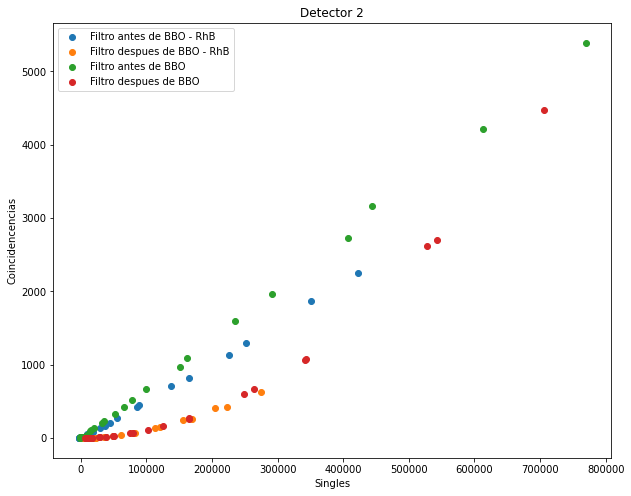

In [65]:
figure(figsize=(10,8))
scatter(singles2R, CoinR, label = 'Filtro antes de BBO - RhB')
scatter(singles2FR, CoinFR, label = 'Filtro despues de BBO - RhB')
scatter(singles2, Coin, label = 'Filtro antes de BBO')
scatter(singles2F, CoinF, label = 'Filtro despues de BBO')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 2')
savefig('all2')

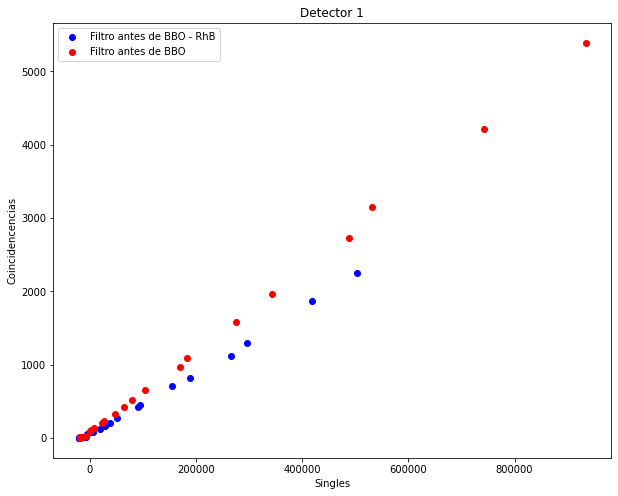

In [66]:
figure(figsize=(10,8))
scatter(singles1R, CoinR, label = 'Filtro antes de BBO - RhB', c = 'b')
scatter(singles1, Coin, label = 'Filtro antes de BBO', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 1')
savefig('Lin1')

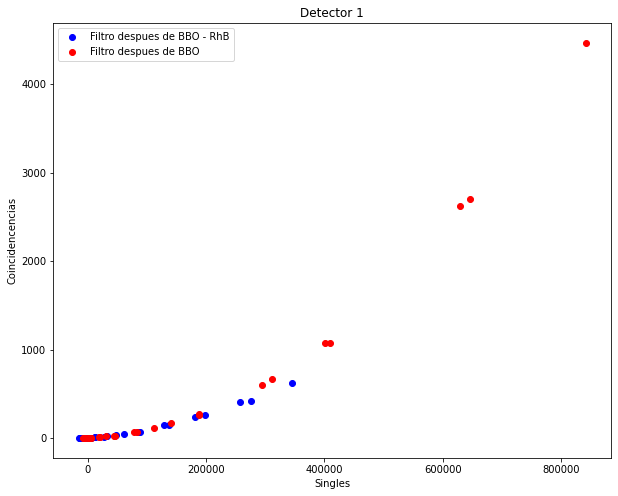

In [67]:
figure(figsize=(10,8))
scatter(singles1FR, CoinFR, label = 'Filtro despues de BBO - RhB', c = 'b')
scatter(singles1F, CoinF, label = 'Filtro despues de BBO', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 1')
savefig('cuad1')

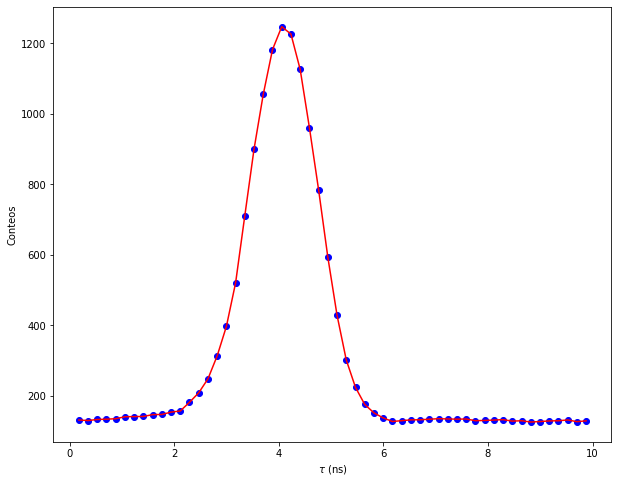

In [68]:
figure(figsize=(10,8))
scatter(t[0][1:],n[0][1:], c = 'b')
plot(t[0][1:],n[0][1:], c = 'r')
xlabel(r'$\tau$ (ns)')
ylabel('Conteos')
savefig('g_correlation')

# **$\sigma$**

In [91]:
R = np.array(Coin)-np.array(CoinR)
RB = np.array(CoinF)-np.array(CoinFR)

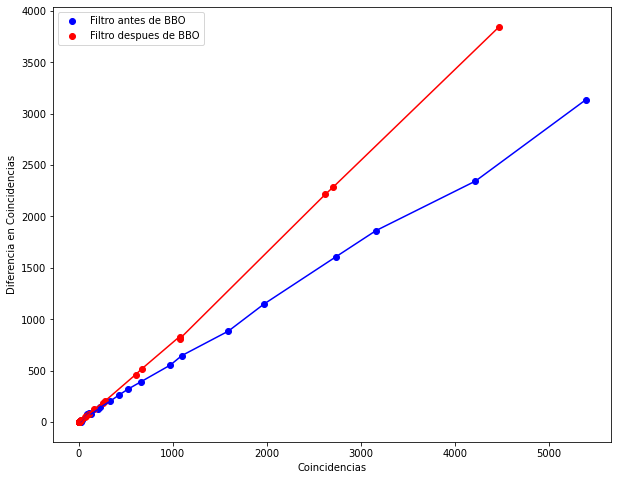

In [92]:
figure(figsize=(10,8))
plot(Coin,R, c = 'b')
plot(CoinF,RB, c = 'r')
scatter(Coin,R, c = 'b', label = 'Filtro antes de BBO')
scatter(CoinF,RB, c = 'r', label = 'Filtro despues de BBO')
xlabel('Coincidencias')
ylabel('Diferencia en Coincidencias')
legend()
savefig('sigma')

$slope = \frac{R_c}{R} = cl\sigma N_A \ \to \ \sigma = \frac{slope}{clN_A}$

In [93]:
R_C = sp.stats.linregress(Coin,R)[0]
RB_C = sp.stats.linregress(CoinF,RB)[0]

In [104]:
sp.stats.linregress(Coin,R)

LinregressResult(slope=0.5748639640442661, intercept=5.8907396567283286, rvalue=0.9995933839310726, pvalue=1.3458281996178964e-38, stderr=0.003347335209336876)

In [105]:
sp.stats.linregress(CoinF,RB)

LinregressResult(slope=0.8522428539645224, intercept=-15.917309030899048, rvalue=0.9995002115210034, pvalue=1.5995749300668017e-37, stderr=0.005502102854434745)

In [106]:
s = R_C/(0.005*0.1*N_A)
sB = RB_C/(0.005*0.1*N_A)

In [107]:
s

1.9091681412118507e-21

In [108]:
sB

2.8303651074556495e-21

In [75]:
R = np.array(singles1)-np.array(singles1R)
RB = np.array(singles1R)-np.array(singles1FR)
R_C = sp.stats.linregress(singles1,R)[0]
RB_C = sp.stats.linregress(singles1F,RB)[0]
s = R_C/(50*0.01*N_A)
sB = RB_C/(50*0.01*N_A)

In [76]:
s

1.4519054786744388e-24

In [77]:
sB

5.4951636777789555e-25

In [78]:
R = np.array(singles2)-np.array(singles2R)
RB = np.array(singles2R)-np.array(singles2FR)
R_C = sp.stats.linregress(singles2,R)[0]
RB_C = sp.stats.linregress(singles2F,RB)[0]
s = R_C/(50*0.01*N_A)
sB = RB_C/(50*0.01*N_A)

In [79]:
s

1.4540308126022207e-24

In [80]:
sB

6.2492293263426225e-25

# **Trash**

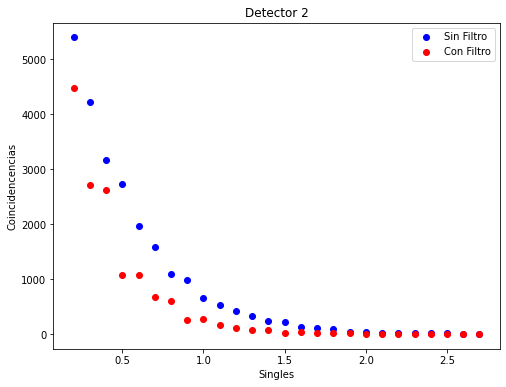

In [ ]:
figure(figsize=(8,6))
scatter(ND, Coin, label = 'Sin Filtro', c = 'b')
scatter(ND, CoinF, label = 'Con Filtro', c = 'r')
xlabel('Singles')
ylabel('Coincidencencias')
legend()
title('Detector 2')
savefig('Singles2Vcoin')

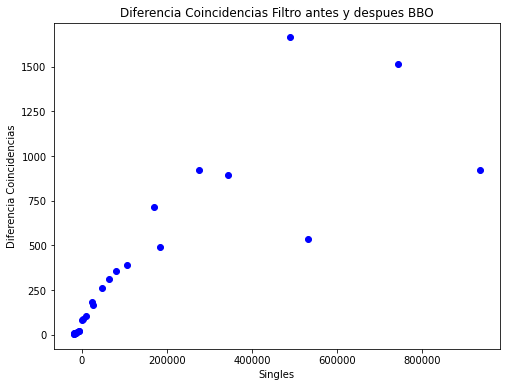

In [ ]:
D = np.array(Coin)-np.array(CoinF)
figure(figsize=(8,6))
scatter(singles1,D, c = 'b')
xlabel('Singles')
ylabel('Diferencia Coincidencias')
title('Diferencia Coincidencias Filtro antes y despues BBO')
savefig('Diff')

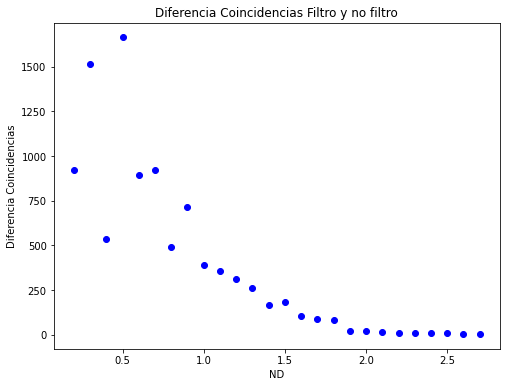

In [ ]:
D = np.array(Coin)-np.array(CoinF)
figure(figsize=(8,6))
scatter(ND,D, c = 'b')
xlabel('ND')
ylabel('Diferencia Coincidencias')
title('Diferencia Coincidencias Filtro y no filtro')
savefig('Diff_ND')

In [ ]:
A = sp.stats.linregress(singles2, Coin)
A

LinregressResult(slope=0.0069483833759663265, intercept=-15.803241870181296, rvalue=0.9997145615452406, pvalue=1.928378039322696e-40, stderr=3.389552610127042e-05)

In [ ]:
B = sp.stats.linregress(singles2F, CoinF)
B

LinregressResult(slope=0.0053928233720347786, intercept=-278.1893932891869, rvalue=0.9557297857560486, pvalue=2.981618769051014e-14, stderr=0.00033891102050359503)

In [ ]:
def f1(x):
    return A[0]*x+A[1]
def f2(x):
    return B[0]*x+B[1]

Text(0.5, 1.0, 'Diferencias Fit filtro y no filtro')

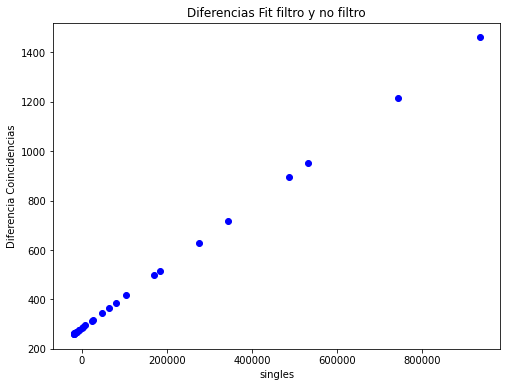

In [ ]:
figure(figsize=(8,6))
scatter(singles1,f1(np.array(singles2))-f2(np.array(singles2)), c = 'b')
xlabel('singles')
ylabel('Diferencia Coincidencias')
title('Diferencias Fit filtro y no filtro')

In [ ]:
A = pd.read_csv('1_1_CoincidenciasBF.csv')
B = pd.read_csv('1_1_CoincidenciasB.csv')

FileNotFoundError: ignored

In [ ]:
a = sum(A['Start-Stop Historam (events per second) - HBT Measurement'][20:29])

TypeError: ignored

In [ ]:
b = sum(B['Start-Stop Historam (events per second) - HBT Measurement'][20:29])

In [ ]:
b/a

147.15289919859126

In [ ]:
N_A

6.02214076e+23